##Importing necessary libraries


In [1]:
!pip install yfinance
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [69]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from pandas_datareader import data
from tqdm.notebook import tqdm

**DESCRIPTION**

---

We will create a portfolio for investment with 5 stocks of 5 different domains such as IT, Textiles, Pharma, Automobiles etc.

---
**STOCKS :**

Linde India Ltd

J B Chemicals and Pharmaceuticals Ltd

Tata Elxsi Ltd

KPR Mill Ltd

Bajaj Finance Ltd

---

Before modelling the portfolio, we will use **Monte Carlo** method to model the price of any stock over a year to analyse if it's worth the risk. **Should I include this stock in  portfolio or not?**



---

The Four Steps for conducting a Monte Carlo analysis are:
1. Construct a Model
2. Generate Random Values
3. Apply them over many, many trials
4. Collect results and analyze.



---




In [46]:
linde = yf.Ticker("LINDEINDIA.NS")
print(linde.history(start="2004-01-01"))
linde = linde.history(start="2004-01-01")

                                  Open         High          Low        Close  \
Date                                                                            
2004-01-01 00:00:00+05:30    47.213518    53.226560    46.723567    52.246658   
2004-01-02 00:00:00+05:30    52.736613    55.409077    51.355841    53.894680   
2004-01-05 00:00:00+05:30    55.052757    55.052757    50.776816    51.712177   
2004-01-06 00:00:00+05:30    52.202125    52.202125    45.431885    47.168987   
2004-01-07 00:00:00+05:30    47.703474    49.485116    46.901737    48.327049   
...                                ...          ...          ...          ...   
2024-02-01 00:00:00+05:30  5611.750000  5635.000000  5493.299805  5509.850098   
2024-02-02 00:00:00+05:30  5524.899902  5596.000000  5524.899902  5550.450195   
2024-02-05 00:00:00+05:30  5619.899902  5733.750000  5528.500000  5575.149902   
2024-02-06 00:00:00+05:30  5700.000000  5725.000000  5561.399902  5705.850098   
2024-02-07 00:00:00+05:30  5

**Number of days** that have elapsed for every price point.

In [47]:
time_elapsed = (linde.index[-1] - linde.index[0]).days
print(time_elapsed)

7342


**Compounded Annual Growth Rate** (cagr) by taking the ratio between the closing price and the opening price and rasing that value to the inverse of the number of years elapsed then substract 1 (in order to make it a percentage of growth).

In [48]:
price_ratio = linde['Close'][-1] / linde['Close'][1]

# Calculate the inverse of the number of years elapsed.
time_elapsed = (linde.index[-1] - linde.index[0]).days
inverse_number_of_years = 365.0 / time_elapsed

# Calculate the CAGR.
cagr = price_ratio ** inverse_number_of_years - 1

# Print the CAGR.
print(f"CAGR: {cagr:.2%}")

CAGR: 26.07%


**Volatility** is the standard deviation of the percent changes in price for each day. This makes sense since it is a measure of how sporadically the price of the stock is changing.

In [49]:
vol = linde['Close'].pct_change().std()
print(vol)

0.025488134576990742


Now, in order to make this figure useful as an annual measure, it has to be scaled by an **Annualization Factor**. This factor is most often the square root of the number of trading days in a year which happens to be 252.


In [50]:
# Calculate the annualized volatility.

# Calculate the number of trading days in a year.
number_of_trading_days = 252

# Multiply the volatility by the square root of the number of trading days.
vol = vol * math.sqrt(number_of_trading_days)

# Print the CAGR and annualized volatility.
print("CAGR (mean returns):", str(round(cagr, 4)))
print("Vol (standard deviation of return):", str(round(vol, 4)))

CAGR (mean returns): 0.2607
Vol (standard deviation of return): 0.4046


**Model a Standard Deviation of Stock prices**


---


Creating random samples using these parameters using normal function from numpy.


In [51]:
# Generate a random sample of daily returns using the normal distribution.

# Calculate the mean and standard deviation of the normal distribution.
mean = cagr / number_of_trading_days
standard_deviation = vol / math.sqrt(number_of_trading_days)

# Generate the random sample.
daily_return_percentages = np.random.normal(mean, standard_deviation, number_of_trading_days) + 1

# Print the random sample.
print(daily_return_percentages)

[0.98030867 1.00942069 0.95488902 1.01537988 0.94796455 1.021698
 1.00218142 1.0258562  0.9837802  0.98465743 1.01373043 1.02419229
 1.00388586 1.00506938 1.03730705 1.0095326  1.02135448 1.01121917
 0.97637433 1.03628154 0.98991697 0.97489968 1.0261033  0.96738916
 0.98823196 0.9670981  1.04685144 0.97422445 0.99267305 1.0207113
 1.00292368 1.02131197 1.06433746 0.98715207 1.01576568 1.03747357
 0.99027624 0.98394996 1.05123627 0.9839648  1.0081018  0.98826161
 1.00053214 0.95041245 1.02256645 0.99269915 1.01806191 0.97029251
 1.00802742 1.01999308 1.0026975  0.97746813 1.0486973  1.00721509
 1.05431685 0.9291141  1.00869832 1.0302034  0.99793943 0.93943481
 0.98692961 1.02538393 0.9908757  0.98845826 1.00624046 1.01025234
 1.03249559 1.0237565  0.95109468 1.03789095 0.98066565 1.01730836
 0.95953215 1.0195514  1.05269396 1.05764568 0.98146955 1.00190675
 0.98878693 1.00516169 0.97256195 1.03803903 0.97657613 0.98543732
 0.98425599 1.01398586 0.99922713 0.97911355 1.05286008 0.9854338

In [52]:
# Create a price series from the list of daily return percentages.

# Initialize the price series with the most recent price.
price_series = [linde['Close'][-1]]

# Iterate through the daily return percentages.
for drp in daily_return_percentages:
    # Calculate the new price by multiplying the most recent price by the daily return percentage plus 1.
    new_price = price_series[-1] * drp
    # Append the new price to the price series.
    price_series.append(new_price)

# Print the price series.
print(price_series)

[5691.0, 5578.936642180403, 5631.49407153107, 5377.451835794041, 5460.156417428259, 5176.034720902694, 5288.344312006798, 5299.8804329987925, 5436.915194308954, 5348.729525854385, 5266.666285153093, 5338.9798937863525, 5468.142046917898, 5489.390491629104, 5517.218278747135, 5723.049429357974, 5777.604996809086, 5900.982744713663, 5967.186876098607, 5826.208063735241, 6037.5918931549595, 5976.714680979912, 5826.697249984285, 5978.793270082413, 5783.81981064634, 5715.755575076083, 5527.696359538862, 5786.676907911551, 5637.52213674813, 5596.21627491048, 5712.121203095146, 5728.82163138728, 5850.914125847384, 6227.347060083944, 6147.338571718403, 6244.255545393127, 6478.250076395386, 6415.257102086974, 6312.291947110749, 6635.710254745122, 6529.305337286877, 6582.2044594630515, 6504.939968651624, 6508.401536623242, 6185.6658480190035, 6325.2543573246585, 6279.0746027587575, 6392.486709553976, 6202.58195355532, 6252.372700022909, 6377.376884576011, 6394.579868538043, 6250.498051013427, 65

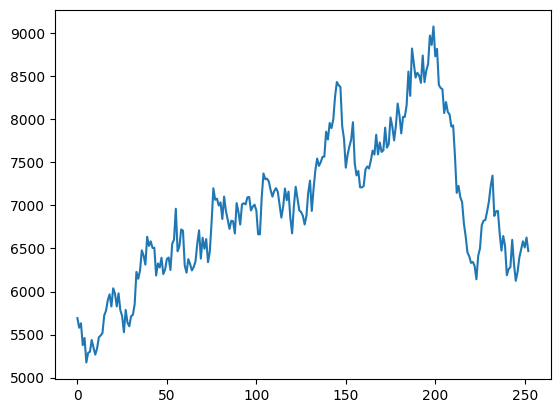

In [53]:
# x-axis represents no. of trading days
# y-axis represents price of stock on each trading day
plt.plot(price_series)
plt.show()

#Applying Random Walk over many trials

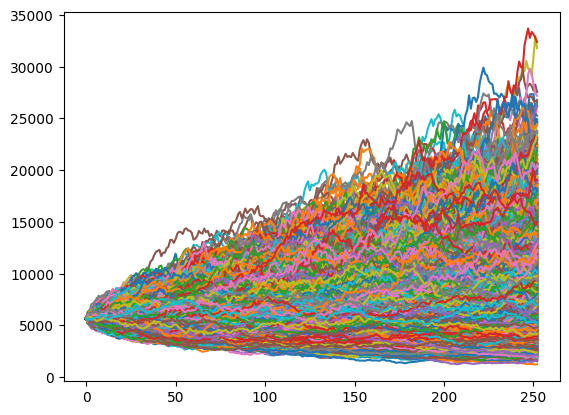

In [54]:
number_of_trials = 20000

# Iterate through the trials.
for i in range(number_of_trials):
    # Generate a random sample of daily returns.
    daily_return_percentages = np.random.normal(cagr / number_of_trading_days, vol / math.sqrt(number_of_trading_days), number_of_trading_days) + 1

    # Initialize the price series.
    price_series = [linde['Close'][-1]]

    # Generate the price series for the current trial.
    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)

    # Plot the price series for the current trial.
    plt.plot(price_series)

# Show the plot.
plt.show()

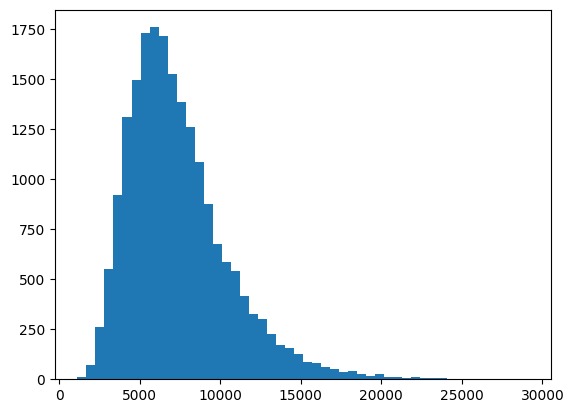

In [55]:
ending_price_points = []

larger_number_of_trials = 20000

# Iterate through the trials.
for i in range(larger_number_of_trials):
    # Generate a random sample of daily returns.
    daily_return_percentages = np.random.normal(cagr / number_of_trading_days, vol / math.sqrt(number_of_trading_days), number_of_trading_days) + 1

    # Initialize the price series with the most recent closing price of Linde India Ltd.
    price_series = [linde['Close'][-1]]

    # Generate the price series for the current trial.
    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)

    # Append the ending price to the list.
    ending_price_points.append(price_series[-1])

plt.show()

plt.hist(ending_price_points,bins=50)
plt.show()

#Results and Analysis

In [56]:
# Calculate the population mean and compare it to the sample mean.
expected_ending_price_point = round(np.mean(ending_price_points),2)
# Calculate the population mean.
population_mean = (cagr + 1) * linde['Close'][-1]
# Print the sample mean and population mean.
print("Sample Mean:", expected_ending_price_point)
print("Population Mean:", round(population_mean, 2))

# Calculate the percent difference between the sample mean and population mean.
percent_difference = round((population_mean - expected_ending_price_point) / population_mean * 100, 2)

# Print the percent difference.
print("Percent Difference:", percent_difference, "%")

Sample Mean: 7387.54
Population Mean: 7174.5
Percent Difference: -2.97 %


In [57]:
# Calculate the top 10% and bottom 10% percentiles of ending price points.

top_ten = np.percentile(ending_price_points, 100 - 10)
bottom_ten = np.percentile(ending_price_points, 10)

# Print the top 10% and bottom 10% percentiles.
print("Top 10%:", round(top_ten, 2))
print("Bottom 10%:", round(bottom_ten, 2))

Top 10%: 11485.1
Bottom 10%: 4027.03


**Linde India Limited** has 10% chance that its stock will grow upto **11485.1** and also have the equal 10% chance that it will drop to **4027.03**. The reward to risk ratio here is quite managable and affordable.


---

In this way, we can also evaluate the other 4 stocks which are listed in the **portfolio** in similar way.

Lets create a Portfolio of these **5 stocks** and then evaluate the allocation percentage of each stock in a portfolio for minimal risk, max return and max sharpe ratio.

In [70]:
# Download the historical stock data using yfinance.
stocks = ['LINDEINDIA.NS','JBCHEPHARM.NS','BAJFINANCE.NS','KPRMILL.NS','TATAELXSI.NS']
start = datetime.datetime(2004,1,1)
end = datetime.datetime(2024,1,1)

df = pd.DataFrame()

for stock in stocks:
    df[stock] = yf.download(stock, start=start, end=end, progress=False)['Close']


# Calculate the percentage returns.
returns = df.pct_change()

# Print the percentage returns.
print(returns)

            LINDEINDIA.NS  JBCHEPHARM.NS  BAJFINANCE.NS  KPRMILL.NS  \
Date                                                                  
2004-01-01            NaN            NaN            NaN         NaN   
2004-01-02       0.031543       0.010432       0.007384         NaN   
2004-01-05      -0.040496      -0.018340       0.021418         NaN   
2004-01-06      -0.087855      -0.002491      -0.032743         NaN   
2004-01-07       0.024551      -0.006382      -0.044980         NaN   
...                   ...            ...            ...         ...   
2023-12-22       0.000796       0.088668      -0.009753   -0.005075   
2023-12-26      -0.005515      -0.000185      -0.018231   -0.010921   
2023-12-27      -0.020206       0.003769       0.009843   -0.004732   
2023-12-28       0.023655      -0.014803       0.003574    0.004633   
2023-12-29      -0.011488       0.015026       0.009520    0.000910   

            TATAELXSI.NS  
Date                      
2004-01-01           N

<Axes: ylabel='Density'>

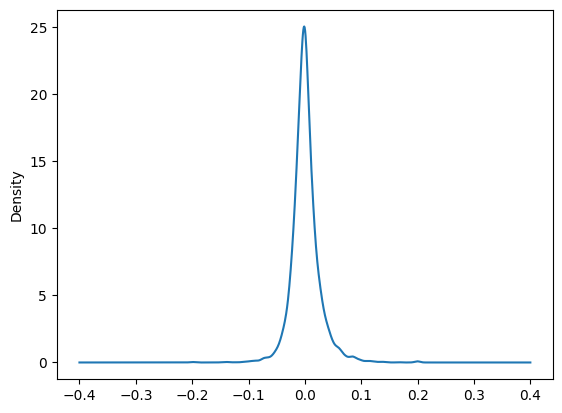

In [71]:
returns['LINDEINDIA.NS'].plot(kind='kde')


In [75]:
# Initialize lists to store portfolio metrics
portfolio_returns = []
portfolio_risk = []
portfolio_sharpe_ratio = []
portfolio_weights = []
numPortfolios = 5000
risk_free_return = 0.061

np.random.seed(0)
for portfolio in tqdm(range(numPortfolios)):
    # Randomized weights for the portfolio
    weights = np.random.random_sample(len(stocks))
    weights /= np.sum(weights)
    portfolio_weights.append(weights)

    # Annual portfolio returns according to above weights
    annual_return = np.sum(returns.mean() * weights) * 252
    portfolio_returns.append(annual_return)

    # Portfolio Risk Calculation
    cov_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_std_dev)

    # Portfolio Sharpe Ratio Calculation
    sharpe_ratio = (annual_return - risk_free_return) / portfolio_std_dev
    portfolio_sharpe_ratio.append(sharpe_ratio)

# Convert lists to numpy arrays for easier manipulation
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)
portfolio_sharpe_ratio = np.array(portfolio_sharpe_ratio)
portfolio_weights = np.array(portfolio_weights)

# Create DataFrame
portfolio_df = pd.DataFrame({
    'Return': portfolio_returns,
    'Risk': portfolio_risk,
    'Sharpe Ratio': portfolio_sharpe_ratio,
    'Associated Weights': portfolio_weights.tolist()
})

print(portfolio_df.head())

  0%|          | 0/5000 [00:00<?, ?it/s]

     Return      Risk  Sharpe Ratio  \
0  0.448905  0.633037      0.612767   
1  0.483506  0.717516      0.588845   
2  0.437200  0.565256      0.665539   
3  0.528305  0.860365      0.543147   
4  0.406154  0.484477      0.712427   

                                  Associated Weights  
0  [0.1935642384935766, 0.25224431266711844, 0.21...  
1  [0.19440830746079796, 0.1317098072068841, 0.26...  
2  [0.2743998205285077, 0.18330691095749266, 0.19...  
3  [0.033664878826107324, 0.007811951917646457, 0...  
4  [0.311854579742372, 0.2546664490497017, 0.1470...  


In [76]:
# Convert 'Risk' column to float before finding the index of the minimum value
min_risk_portfolio_index = portfolio_df['Risk'].astype(float).argmin()

# Select the row corresponding to the minimum risk portfolio
min_risk_portfolio = portfolio_df.iloc[min_risk_portfolio_index].to_frame().T

print(min_risk_portfolio)


        Return      Risk Sharpe Ratio  \
4945  0.330796  0.292444     0.922557   

                                     Associated Weights  
4945  [0.39899153737496806, 0.15865042222168646, 0.0...  


In [77]:
print('For a minimal Risk Portfolio')
print()
print('STOCK SYMBOL' + ' ' + 'Allocation Percentage')
print('--------------------------')

for stock, per_alloc in zip(stocks, min_risk_portfolio['Associated Weights'].values[0]):
    print()
    print(stock + ' ------------- ' + str(per_alloc * 100))


For a minimal Risk Portfolio

STOCK SYMBOL Allocation Percentage
--------------------------

LINDEINDIA.NS ------------- 39.8991537374968

JBCHEPHARM.NS ------------- 15.865042222168647

BAJFINANCE.NS ------------- 0.2848398865206037

KPRMILL.NS ------------- 28.0531427478534

TATAELXSI.NS ------------- 15.897821405960558


In [78]:
max_return_portfolio_index = portfolio_df['Risk'].astype(float).argmax()

# Select the row corresponding to the minimum risk portfolio
max_return_portfolio = portfolio_df.iloc[max_return_portfolio_index].to_frame().T

print(max_return_portfolio)


       Return      Risk Sharpe Ratio  \
670  0.753666  1.776419     0.389923   

                                    Associated Weights  
670  [0.006552481308248517, 0.13992584901607197, 0....  


In [79]:
print('For a maximum return portfolio')
print()
print('STOCK SYMBOL' + ' ' + 'Allocation Percentage')
print('--------------------------')

for stock, per_alloc in zip(stocks, max_return_portfolio['Associated Weights'].values[0]):
    print()
    print(stock + ' ------------- ' + str(per_alloc * 100))


For a maximum return portfolio

STOCK SYMBOL Allocation Percentage
--------------------------

LINDEINDIA.NS ------------- 0.6552481308248517

JBCHEPHARM.NS ------------- 13.992584901607197

BAJFINANCE.NS ------------- 74.91502391888896

KPRMILL.NS ------------- 2.3557718479341525

TATAELXSI.NS ------------- 8.081371200744833


In [80]:
max_sharpeRatio_portfolio_index = portfolio_df['Sharpe Ratio'].astype(float).argmax()

# Select the row corresponding to the minimum risk portfolio
max_sharpeRatio_portfolio = portfolio_df.iloc[max_sharpeRatio_portfolio_index].to_frame().T

print(max_sharpeRatio_portfolio)


        Return      Risk Sharpe Ratio  \
3012  0.348028  0.308242     0.931178   

                                     Associated Weights  
3012  [0.36332377483118716, 0.07510129914708032, 0.0...  


In [81]:
print('For a maximum sharpe Ratio portfolio')
print()
print('STOCK SYMBOL' + ' ' + 'Allocation Percentage')
print('--------------------------')

for stock, per_alloc in zip(stocks, max_sharpeRatio_portfolio['Associated Weights'].values[0]):
    print()
    print(stock + ' ------------- ' + str(per_alloc * 100))


For a maximum sharpe Ratio portfolio

STOCK SYMBOL Allocation Percentage
--------------------------

LINDEINDIA.NS ------------- 36.33237748311872

JBCHEPHARM.NS ------------- 7.510129914708032

BAJFINANCE.NS ------------- 2.448141675259482

KPRMILL.NS ------------- 34.024544796183655

TATAELXSI.NS ------------- 19.68480613073012
